In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [19]:

# Specify the atom
atom = 'Pb'

In [16]:

# Function to load data and handle irregularities
def load_data(filename):
    data = np.genfromtxt(filename, invalid_raise=False)
    # Assuming the first column is energy and the second column is DOS
    if data.ndim == 1:  # Handle case where there's only one row of data
        data = np.expand_dims(data, axis=0)
    energy = data[:, 0]
    dos = data[:, 1]
    return energy, dos

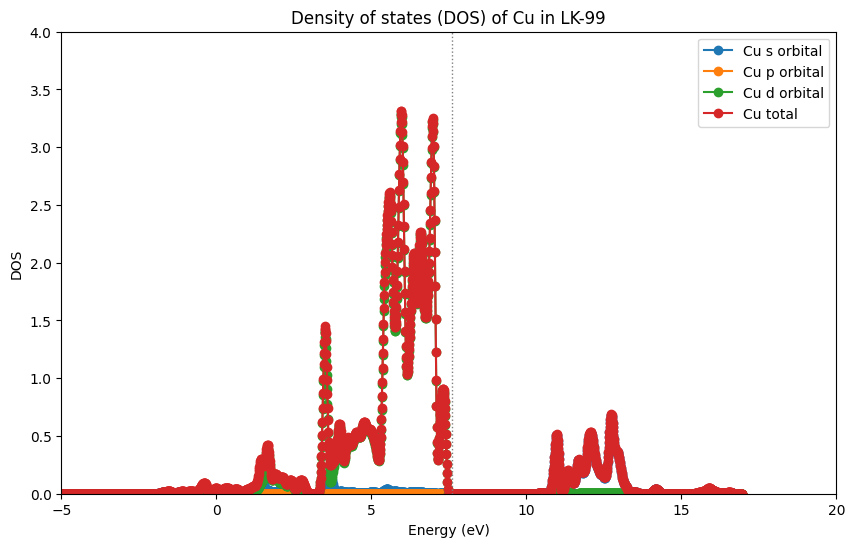

In [18]:

# Load data from files
energy_s, dos_s = load_data(f'atom_{atom}_s.dat')
energy_p, dos_p = load_data(f'atom_{atom}_p.dat')
energy_d, dos_d = load_data(f'atom_{atom}_d.dat')
energy_tot, dos_tot = load_data(f'atom_{atom}_tot.dat')

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(energy_s, dos_s, label=f'{atom} s orbital', marker='o')
plt.plot(energy_p, dos_p, label=f'{atom} p orbital', marker='o')
plt.plot(energy_d, dos_d, label=f'{atom} d orbital', marker='o')
plt.plot(energy_tot, dos_tot, label=f'{atom} total', marker='o')

# Fermi energy line
fermi_energy = 7.6085
plt.axvline(x=fermi_energy, color='grey', linestyle='dotted', linewidth=1)

# Titles and labels
plt.title(f'Density of states (DOS) of {atom} in LK-99')
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')

# Automatic ticks
plt.xticks()
plt.yticks()
plt.xlim(-5,20)
plt.ylim(0,4)

# Show legend
plt.legend()

# Show plot
plt.show()

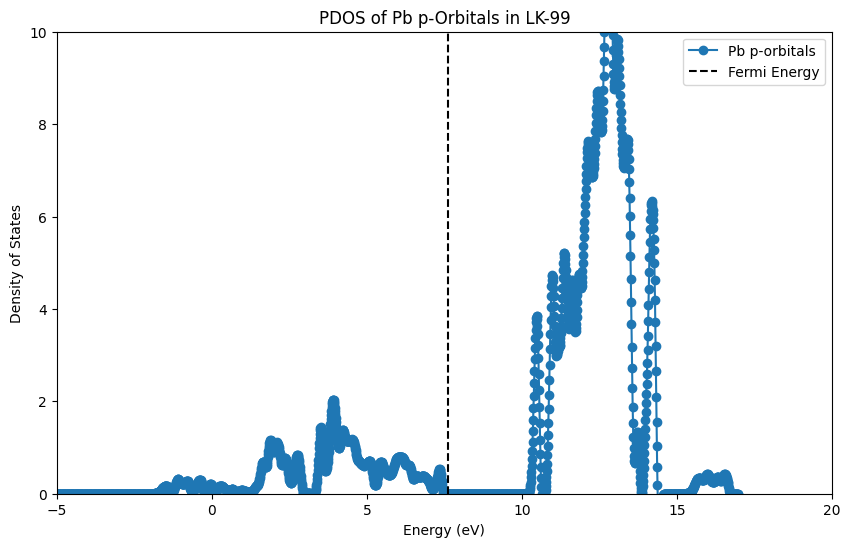

Pb p-orbital peak positions: [-7.2927e+01 -7.2687e+01 -7.2497e+01 -1.3237e+01 -1.0997e+01 -1.0567e+01
 -9.3470e+00 -6.9370e+00 -1.4770e+00 -1.0970e+00 -8.0700e-01 -3.9700e-01
 -4.7000e-02  2.8300e-01  1.6430e+00  1.8830e+00  2.1030e+00  2.3630e+00
  2.7530e+00  3.5130e+00  3.9030e+00  4.2130e+00  4.5330e+00  5.0730e+00
  5.4530e+00  6.0130e+00  6.0330e+00  6.1130e+00  6.3430e+00  6.6130e+00
  6.8030e+00  7.3430e+00  1.0473e+01  1.0983e+01  1.1363e+01  1.1613e+01
  1.1843e+01  1.2143e+01  1.2443e+01  1.2783e+01  1.3073e+01  1.3393e+01
  1.3723e+01  1.4183e+01  1.5713e+01  1.5973e+01  1.6313e+01  1.6543e+01]


In [33]:
orbital = 'p'  # Replace 'd' with the desired orbital type (e.g., 's', 'p', 'd', 'f')

# Load data
energy, dos = load_data(f'atom_{atom}_{orbital}.dat')

# Plotting the PDOS
plt.figure(figsize=(10, 6))
plt.plot(energy, dos, label=f'{atom} {orbital}-orbitals', marker='o')
plt.axvline(x=7.6085, color='k', linestyle='--', label='Fermi Energy')
plt.xlabel('Energy (eV)')
plt.ylabel('Density of States')
plt.legend()
plt.title(f'PDOS of {atom} {orbital}-Orbitals in LK-99')
plt.xlim(-5, 20)
plt.ylim(0, 10)
plt.show()

# Finding peaks
peaks, _ = find_peaks(dos, height=0.1)
peak_energies = energy[peaks]
peak_dos = dos[peaks]

# Printing peak positions
print(f'{atom} {orbital}-orbital peak positions:', peak_energies)